# <span style="color:brown">Project 2 : Ames Housing Data and Kaggle Challenge</span>
---
## <span style="color:Blue">Train Dataset Model Preparation - Basic Models</span>

#### Ryan McDonald, General Assembly
---

### Step 1: Reading the Data 
**Imports/ Read The Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
train = pd.read_csv("../datasets/project_data/clean_train.csv")
pd.set_option('display.max_columns', 75)
train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,mo_sold,yr_sold,saleprice,ms_zoning_RH,ms_zoning_RL,...,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD,total_baths,tot_fin_sq,home_age
0,60,68.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,3,2010,130500,0,1,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.5,2012.0,34
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,4,2009,220000,0,1,...,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,3.5,2759.0,13
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,1,2010,109000,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.0,1788.0,57
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,4,2010,174000,0,1,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2.5,1444.0,4
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,3,2010,138500,0,1,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,1445.0,110


In [3]:
train.shape

(1995, 226)

In [4]:
#train['log_saleprice'] = np.log10(train['saleprice'])


### Step 2: Basic Modeling


### MODEL #1

   **-First model will be basic LR on a single variable (strongest correlation to sale price)**
   
   **-Conducting first model with 'overall_qual' as feature (X) to target variable(y) of 'saleprice'**

**First: The Null Model**

In [5]:
# Would our model perform better than 'guessing' the 
# mean each time for new predictions?
train['saleprice'].mean()

180050.08822055138

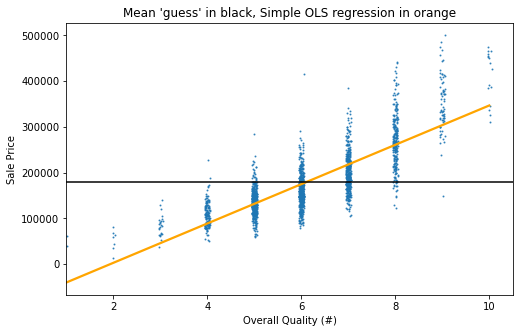

In [6]:
plt.figure(figsize = (8, 5))
sns.regplot(x='overall_qual', y='saleprice', data= train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'},
           x_jitter= 0.05)
plt.axhline(train['saleprice'].mean(), color = 'black')
plt.xlabel('Overall Quality (#)')
plt.ylabel('Sale Price')
plt.title("Mean 'guess' in black, Simple OLS regression in orange");

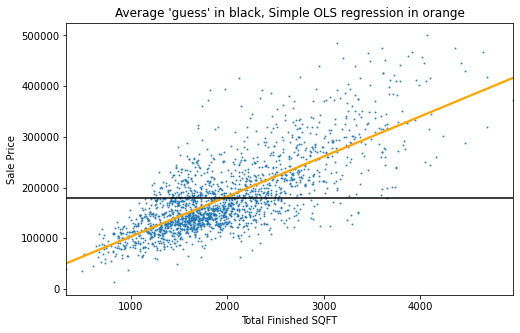

In [7]:
plt.figure(figsize = (8, 5))
sns.regplot(x='tot_fin_sq', y='saleprice', data= train, ci=None, 
            scatter_kws = {'s': 1}, 
            line_kws = {'color': 'orange'},
           x_jitter= 0.5)
plt.axhline(train['saleprice'].mean(), color = 'black')
plt.xlabel('Total Finished SQFT')
plt.ylabel('Sale Price')
plt.title("Average 'guess' in black, Simple OLS regression in orange");

## Now, modeling off highest correlated feature, 'overall quality'

In [8]:
corr = train.corr()[['saleprice']]
corr.sort_values(by = 'saleprice', ascending = False).head(10)

,saleprice
saleprice,1.000000
overall_qual,0.806709
tot_fin_sq,0.749570
gr_liv_area,0.710600
garage_area,0.650912
garage_cars,0.650673
total_bsmt_sf,0.646949
1st_flr_sf,0.633082
total_baths,0.626165
year_built,0.578349


In [9]:
X = train[['overall_qual']]
y = train['saleprice']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42 )

#### Linear Regression Model 1

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
lr.score(X_train, y_train)

0.6458288369120251

In [13]:
lr.score(X_test, y_test)

0.6555805037641309

In [14]:
predictions = lr.predict(X)

In [15]:
print(lr.intercept_)
print(lr.coef_)

-83108.06700931012
[43140.57397869]


**For every unit increase in Overall Quality, saleprice can be expected to raise by $43,140 (All things held equal)**

In [16]:
np.sqrt(metrics.mean_squared_error(y, predictions))

43448.34329685579

### Data Visualizations

In [17]:
train['logsale']= np.log10(train['saleprice'])

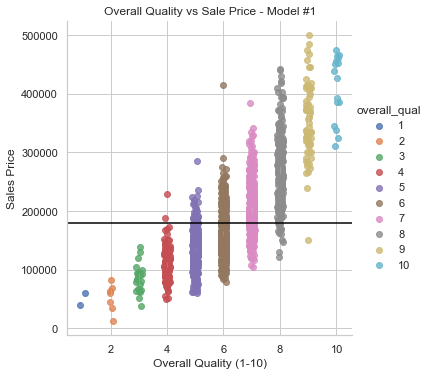

In [18]:
resids = y - predictions

sns.set_theme(style="whitegrid")
sns.lmplot(x='overall_qual', y='saleprice', data= train, hue = 'overall_qual', x_jitter= 0.1)
plt.xlabel('Overall Quality (1-10)')
plt.ylabel('Sales Price')
plt.title('Overall Quality vs Sale Price - Model #1')
plt.axhline(train['saleprice'].mean(), color = 'black')
plt.show()

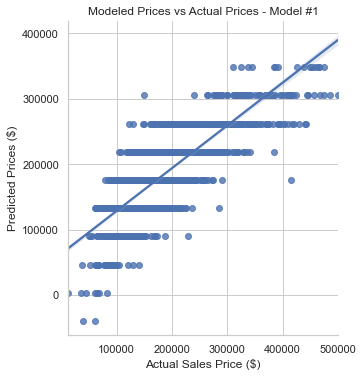

In [19]:
train['predictions']= predictions
sns.lmplot(x='saleprice', y='predictions', data=train, x_jitter = 0)

plt.ylabel('Predicted Prices ($)')
plt.xlabel('Actual Sales Price ($)')
plt.title('Modeled Prices vs Actual Prices - Model #1')
plt.show()
plt.show()

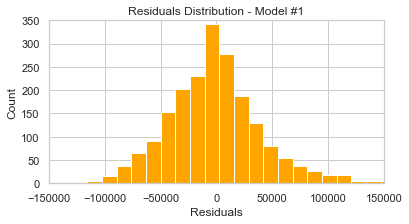

In [20]:
plt.figure(figsize=(6,3))
plt.hist(resids, bins=30, color = 'orange');
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #1')

plt.xlim(-150000, 150000)
plt.ylim(0, 350)
plt.show()


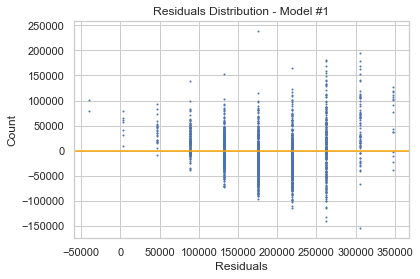

In [21]:
plt.scatter(predictions, resids, s=1 )
plt.axhline(0, color="orange");
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #1')
plt.show()

### Overall scores on the model above are not very good.  Will continue to add features and interaction terms to improve model

### MODEL #2

   **-Second model will utilize several features from dataset (strongest correlation to sale price)**
   
   **-Conducting first model with top 20 best-correlated features (X) to target variable(y) of 'saleprice'**

In [22]:
corr = train.corr()[['saleprice']]
corr.sort_values(by = 'saleprice', ascending = False).head(21)

,saleprice
saleprice,1.000000
logsale,0.959464
overall_qual,0.806709
predictions,0.806709
tot_fin_sq,0.749570
gr_liv_area,0.710600
garage_area,0.650912
garage_cars,0.650673
total_bsmt_sf,0.646949
1st_flr_sf,0.633082


In [23]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add','foundation_PConc','full_bath',
            'exter_qual_Gd','totrms_abvgrd','mas_vnr_area','bsmtfin_type_1_GLQ',
            'fireplaces','neighborhood_NridgHt','bsmtfin_sf_1',
            'garage_type_Attchd']

In [24]:
X = train[features]
y = train['saleprice']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 )

#### (Multi)Linear Regression Model 2

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.score(X_train, y_train)

0.8755347941701505

In [28]:
lr.score(X_test, y_test)

0.8586205299567278

In [29]:
print(lr.intercept_)
print(lr.coef_)

-1170876.3574890946
[ 1.51977766e+04  6.25624181e+00  4.76403518e+01  3.74664973e+01
 -8.58244385e+02  1.49818158e+01  1.50679959e+01 -7.94381835e+02
  1.99207432e+02  3.70006492e+02  1.01732177e+04 -6.33297011e+03
 -3.69189972e+03 -1.31056718e+03  2.02348308e+01  9.84501975e+02
  6.78806198e+03  2.43074608e+04  1.87011661e+01 -1.95878063e+03]


In [30]:
list(zip(features, lr.coef_))
pd.DataFrame(lr.coef_, index = features, columns=['Coefficient'])

#For every unit increase in each category below, 
#the predicted sales price will increase/decrease by 
#the amount of the coefficient (in $)

,Coefficient
overall_qual,15197.776639
tot_fin_sq,6.256242
gr_liv_area,47.640352
garage_area,37.466497
garage_cars,-858.244385
total_bsmt_sf,14.981816
1st_flr_sf,15.067996
total_baths,-794.381835
year_built,199.207432
year_remod/add,370.006492


**Interesting finding: Although all of the features above were 'highly' correlated with sales price, after modeling, some features result in a negative coefficient!**

In [31]:
predictions = lr.predict(X)

In [32]:
np.sqrt(metrics.mean_squared_error(y, predictions))

26328.627610387397

### Data Visualizations

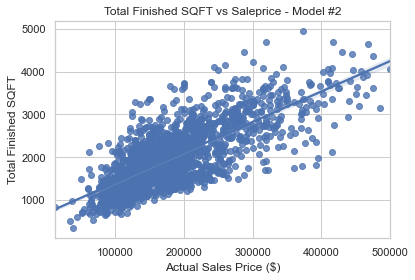

In [33]:

sns.regplot(x='saleprice', y='tot_fin_sq', data=train)

plt.ylabel('Total Finished SQFT')
plt.xlabel('Actual Sales Price ($)')
plt.title('Total Finished SQFT vs Saleprice - Model #2')
plt.show()


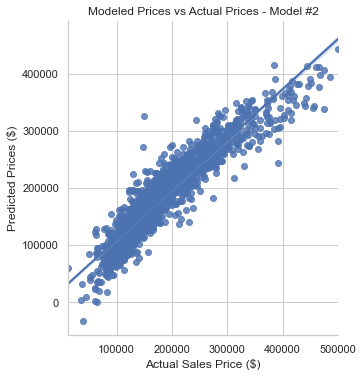

In [34]:
train['predictions']= predictions
sns.lmplot(x='saleprice', y='predictions', data=train)

plt.ylabel('Predicted Prices ($)')
plt.xlabel('Actual Sales Price ($)')
plt.title('Modeled Prices vs Actual Prices - Model #2')
plt.show()


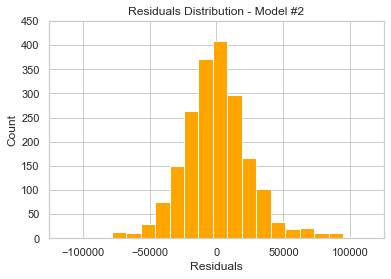

In [35]:
resids = y - predictions
plt.hist(resids, bins=30, color = 'orange');
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #2')

plt.xlim(-125000, 125000)
plt.ylim(0, 450)
plt.show()

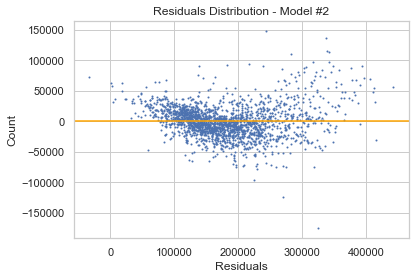

In [36]:
plt.scatter(predictions, resids, s=1)
plt.axhline(0, color="orange");
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #2')
plt.show()

### Overall scores on the model above improved .  Will continue to add features and interaction terms to improve model

### MODEL #3

   **-Third model will utilize several additional features from dataset (strongest correlation to sale price)**
   
   **-Conducting model with top 40 best-correlated features (X) to target variable(y) of 'saleprice'**

In [37]:
features = ['overall_qual','tot_fin_sq','gr_liv_area','garage_area',
            'garage_cars','total_bsmt_sf','1st_flr_sf','total_baths',
            'year_built','year_remod/add','foundation_PConc','full_bath',
            'exter_qual_Gd','totrms_abvgrd','mas_vnr_area','bsmtfin_type_1_GLQ',
            'fireplaces','neighborhood_NridgHt','bsmtfin_sf_1',
            'garage_type_Attchd','lot_frontage','exterior_1st_VinylSd',
            'open_porch_sf','exterior_2nd_VinylSd','bsmt_exposure_Gd',
            'lot_area','kitchen_qual_Gd','sale_type_New','wood_deck_sf',
            'mas_vnr_type_Stone','paved_drive_Y','neighborhood_NoRidge',
            'half_bath','bsmt_full_bath','mas_vnr_type_BrkFace','garage_cond_TA',
            'central_air_Y','garage_yr_blt','bsmt_qual_Gd','garage_qual_TA']

In [38]:
X = train[features]
y = train['saleprice']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42 )

#### (Multi)Linear Regression Model 3

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**R2 for train and test data in Model 3**

In [41]:
r2_train=lr.score(X_train, y_train)
r2_train

0.9015417531109723

In [42]:
r2_test = lr.score(X_test, y_test)
r2_test

0.8737314782756705

In [43]:
print(lr.intercept_)
print(lr.coef_)

-1399755.2189449428
[ 1.46569356e+04  9.21182665e+00  4.20699238e+01  1.96609208e+01
  1.64053892e+03  1.50676211e+01  1.61032768e+00 -6.66783971e+03
  3.25117702e+02  3.64744638e+02  9.89298440e+03  3.73890605e+03
  1.45743322e+03 -2.43015061e+03  2.87570143e+01  2.00627484e+03
  6.38428318e+03  1.84452969e+04  1.32360575e+01 -2.05484386e+03
  1.86907348e+02 -7.78552553e+03  1.73806316e+01  8.41312472e+03
  1.73738094e+04  1.06496502e+00 -4.19098270e+03  1.84555439e+04
  1.58195541e+01 -4.14684289e+03  4.13053208e+03  2.13937478e+04
  1.07625916e+03  5.52420409e+03 -8.42880254e+03 -1.13506716e+03
 -1.17705742e+03  5.12479601e+00 -1.38744524e+04 -1.30889164e+04]


**RSME for Model 3**

In [44]:
predictions = lr.predict(X)

In [45]:
np.sqrt(metrics.mean_squared_error(y, predictions))

23794.178587473707

**Adjusted R2 for Model 3**

In [46]:
1 - (1-lr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8930796323944395

### Data Visualizations

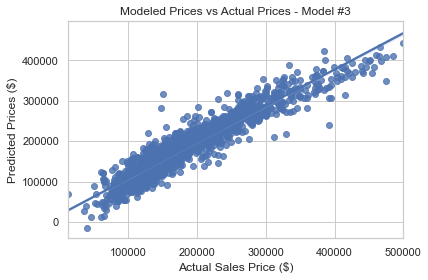

In [47]:
train['predictions']= predictions
sns.regplot(x='saleprice', y='predictions', data=train)

plt.ylabel('Predicted Prices ($)')
plt.xlabel('Actual Sales Price ($)')
plt.title('Modeled Prices vs Actual Prices - Model #3')

plt.show()


Text(0.5, 1.0, 'Residuals Distribution - Model #3')

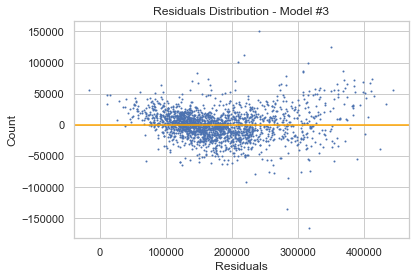

In [48]:
resids = y - predictions
plt.scatter(predictions, resids, s=1)
plt.axhline(0, color="orange");
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #3')


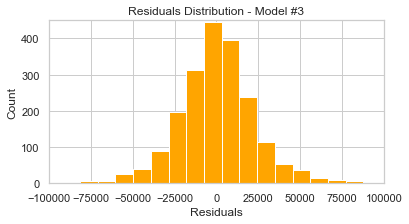

In [49]:
resids = y - predictions
plt.figure(figsize=(6,3))
plt.hist(resids, bins=30, color = 'orange');
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution - Model #3')

plt.xlim(-100000, 100000)
plt.ylim(0, 450)
plt.show()

### Overall scores on the model above improved .  Not seeing a much better R2 or RMSE by doubling features utilized. Will begin to employ additional techniques/ pre-proccessing prior to modeling.